# Introduction

In this lab, we will demonstrate how to measure the Out-Of-Bag (OOB) error rate for a Random Forest model using the Python scikit-learn library. The OOB error rate is the average error for each training observation calculated using predictions from the trees that do not contain the observation in their respective bootstrap sample. This allows the Random Forest model to be fit and validated while being trained.

# Import Required Libraries

We will begin by importing the required libraries, including scikit-learn, NumPy, and Matplotlib. We will also set a random state value to ensure reproducibility.

In [1]:
import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 123

# Generate a Binary Classification Dataset

Next, we will generate a binary classification dataset using the **make_classification** function provided by scikit-learn. This function allows us to specify the number of samples, features, clusters per class, and informative features. We will use a fixed random state value to ensure reproducibility.

In [2]:
X, y = make_classification(
    n_samples=500,
    n_features=25,
    n_clusters_per_class=1,
    n_informative=15,
    random_state=RANDOM_STATE,
)

# Define the Ensemble Classifiers

We will define a list of three Random Forest classifiers, each with a different value for the **max_features** parameter. We will set the **warm_start** construction parameter to **True** to enable tracking of the OOB error rate during training. We will also set the **oob_score** parameter to **True** to enable OOB error rate calculation.

In [3]:
ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
]

# Calculate the OOB Error Rate

For each classifier, we will loop through a range of **n_estimators** values and fit the classifier to the dataset. We will record the OOB error rate for each **n_estimators** value and store it in an **OrderedDict** object.

In [4]:
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

min_estimators = 15
max_estimators = 150

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Visualize the OOB Error Rate

Finally, we will plot the OOB error rate for each classifier as a function of the number of estimators. This will allow us to identify the number of estimators at which the error rate stabilizes. We will use Matplotlib to generate the plot.

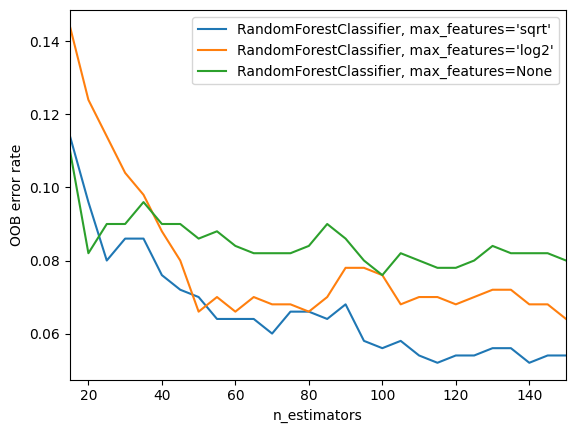

In [5]:
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

# Summary

In this lab, we demonstrated how to measure the Out-Of-Bag (OOB) error rate for a Random Forest model using scikit-learn. We generated a binary classification dataset, defined a list of ensemble classifiers, calculated the OOB error rate for each classifier, and visualized the results. This technique allows us to estimate the error rate of a Random Forest model without the need for a separate validation set.